# 圆环数据测试

## 生成样本集——圆环形

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
 
X,_ = datasets.make_moons(500,noise = 0.1,random_state=1)
df = pd.DataFrame(X,columns = ['feature1','feature2'])
df

,feature1,feature2
0,0.316556,-0.049422
1,0.740883,-0.481286
2,0.871726,0.566562
3,0.555528,0.634506
4,2.038729,0.138594
...,...,...
495,0.047188,0.348184
496,0.731027,0.642307
497,1.287775,-0.451570
498,-0.976648,0.213406


<Axes: title={'center': 'dataset by make_moon'}, xlabel='feature1', ylabel='feature2'>

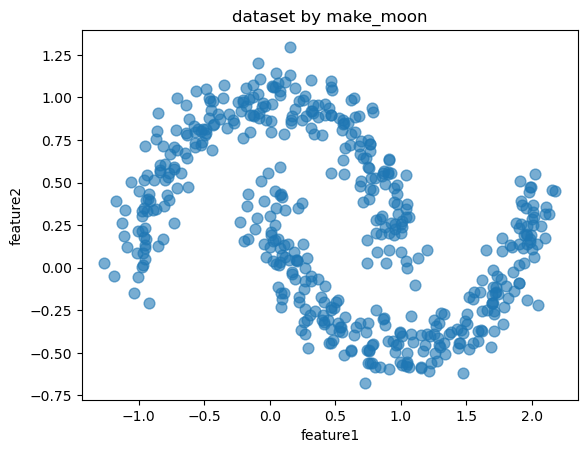

In [2]:
df.plot.scatter('feature1','feature2', s = 60,alpha = 0.6, title = 'dataset by make_moon')

## dbscan聚类

In [3]:
from sklearn.cluster import dbscan
 
core_samples,cluster_ids = dbscan(X, eps = 0.2, min_samples=20) # eps为邻域半径，min_samples为最少点数目
cluster_ids  # 聚类结果标签，cluster_ids中-1表示对应的点为噪声点

array([ 0,  0,  1,  1,  0,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  0,  0,  0, -1,  1,  0,  1,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1, -1,  1,  1,  0,
        0,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  1,  1,  0,  1,  0,  0,  0,  1,  1, -1,  1,  0,  1,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,
        1,  0,  0, -1,  1,  1,  0,  1,  0,  0,  0,  0, -1,  1,  1,  0,  0,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0, -1,  1,
        1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        1,  0,  1,  1,  1,  0,  1,  1,  0, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  0,  1,  0,  1

注意：cluster_ids中-1表示对应的点为噪声点。

将聚类标签和原始样本拼在一起。

In [4]:
df['cluster_id'] = cluster_ids
df

,feature1,feature2,cluster_id
0,0.316556,-0.049422,0
1,0.740883,-0.481286,0
2,0.871726,0.566562,1
3,0.555528,0.634506,1
4,2.038729,0.138594,0
...,...,...,...
495,0.047188,0.348184,0
496,0.731027,0.642307,1
497,1.287775,-0.451570,0
498,-0.976648,0.213406,1


<Axes: title={'center': 'DBSCAN cluster result'}, xlabel='feature1', ylabel='feature2'>

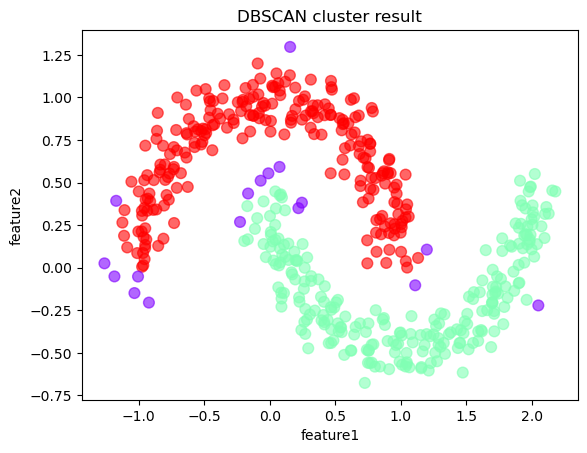

In [5]:
df.plot.scatter('feature1','feature2', s = 60,
                c = list(df['cluster_id']),cmap = 'rainbow',colorbar = False,
                alpha = 0.6,title = 'DBSCAN cluster result')

## K-means聚类

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "d:\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "d:\anaconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "d:\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 24: invalid continuation byte
d:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 

Text(0.5, 1.0, 'silhouette_scores')

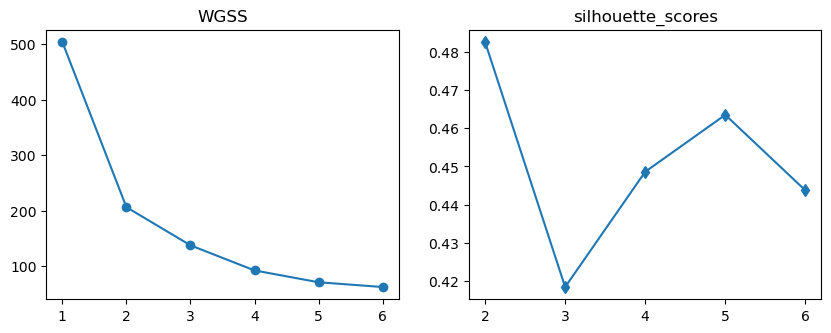

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score  #总的聚类效果轮廓系数
from sklearn.metrics import silhouette_samples   #单个样本的轮廓系数
 
fig=plt.figure(figsize=(10,3.5)) #表示绘制图形的画板尺寸为6*4.5；
 
#WGSS
ax=fig.add_subplot(1,2,1)
wgss=[]   
for i in range(6):
    cluster = KMeans(n_clusters=i+1, random_state=0).fit(X)
    wgss.append(cluster.inertia_)  #inertia_：每个点到其簇的质心的距离之和。即WGSS
#绘制WGSS的碎石图
plt.plot([i+1 for i in range(6)],wgss,marker='o')
plt.title('WGSS')
 
#轮廓系数
ax=fig.add_subplot(1,2,2)
silhouette_scores=[]   
for i in range(1,6):
    cluster = KMeans(n_clusters=i+1, random_state=0).fit(X)
    # 访问labels_属性，获得聚类结果
    y_pred = cluster.labels_
    # 计算平均轮廓系数
    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)
#绘制silhouette_scores的碎石图
plt.plot([i+1 for i in range(1,6)],silhouette_scores,marker='d')
plt.title('silhouette_scores')

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: title={'center': 'KMeans cluster result'}, xlabel='feature1', ylabel='feature2'>

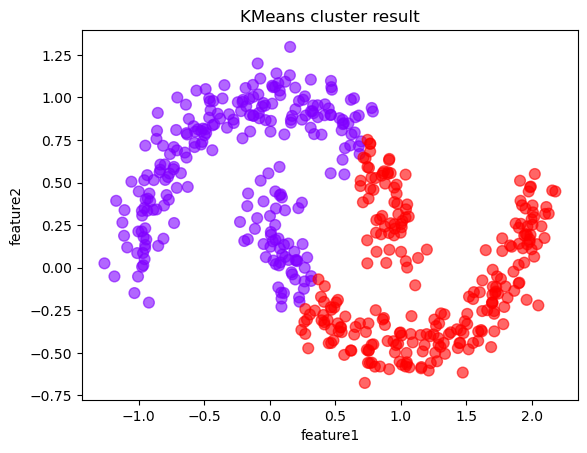

In [7]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)
df['label']=cluster.labels_
df.plot.scatter('feature1','feature2', s = 60,
                c = list(df['label']),cmap = 'rainbow',colorbar = False,
                alpha = 0.6,title = 'KMeans cluster result')